# Day 1

In [1]:
import re

from adventofcodedata_22 import data_day1

### Part 1

In [15]:
# print(repr(data_day1))
elves = data_day1.split("\n\n")
for i, individual in enumerate(elves):
    elves[i] = individual.split("\n")
    for j, calories in enumerate(elves[i]):
        elves[i][j] = int(elves[i][j])
    elves[i] = sum(elves[i])
print(max(elves))


71506


### Part 2

In [19]:
elves.sort()
print(sum(elves[-3:]))

209603


# Day 2

## Data

In [1]:
from adventofcodedata_22 import data_day2
# sample_data = []

input_data = data_day2

## Part 1

### Functions

In [10]:
def is_win(game):
    if (game[0] == "A" and game[1] == "Y") or (game[0] == "B" and game[1] == "Z") or (game[0] == "C" and game[1] == "X"):
        return True
    else:
        return False

def is_draw(game):
    if (game[0] == "A" and game[1] == "X") or (game[0] == "B" and game[1] == "Y") or (game[0] == "C" and game[1] == "Z"):
        return True
    else:
        return False

def get_points(game):
    return ord(game[1])-87 + 6*is_win(game) + 3*is_draw(game)

### Code

In [11]:
games = input_data.split("\n")
scores = []
for i, game in enumerate(games):
    try:
        games[i] = [game[0], game[2]]
        scores.append(get_points(games[i]))
    except:
        del games[i]

print(sum(scores))

## Part 2

### Functions

In [28]:
def is_win_2(game):
    if game[1] == "Z":
        return True
    else:
        return False

def is_draw_2(game):
    if game[1] == "Y":
        return True
    else:
        return False
    
def my_score(game):
    if is_win_2(game):
        return (ord(game[0])-64)%3+1
    if is_draw_2(game):
        return ord(game[0])-64
    else:
        return ord(game[0])%3+1

def get_points_2(game):
    return my_score(game) + 6*is_win_2(game) + 3*is_draw_2(game)

### Code

In [29]:
scores_2 = []
for game in games:
    scores_2.append(get_points_2(game))

print(sum(scores_2))

13726


# Day 3

### Data

In [1]:
from adventofcodedata_22 import data_day3

input_data = data_day3

### Part 1

In [26]:
sack_contents = input_data.splitlines()

total_prio = 0

for sack in sack_contents:
    comp1 = sack[:len(sack)//2]
    comp2 = sack[len(sack)//2:]

    double_item = "".join(set(comp1)&set(comp2))

    item_prio = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ".index(double_item)+1
    total_prio += item_prio

print(total_prio)

7763


### Part 2

In [27]:
total_badge_prio = 0

for i in range(int(len(sack_contents)/3)):
    sack1 = set(sack_contents[3*i])
    sack2 = set(sack_contents[3*i+1])
    sack3 = set(sack_contents[3*i+2])
    
    badge = "".join(sack1&sack2&sack3)
    badge_prio = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ".index(badge)+1

    total_badge_prio += badge_prio

print(total_badge_prio)


2569


# Day 4

### Data

In [6]:
from adventofcodedata_22 import data_day4

import re

input_data = data_day4

### Part 1

In [25]:
pairs = input_data.splitlines()
overlapping = 0

for pair in pairs:
    regex = r"(\d+)-(\d+),(\d+)-(\d+)"
    m = re.match('(\d+)-(\d+),(\d+)-(\d+)', pair)
    if ((int(m[1])<=int(m[3])) and (int(m[2])>=int(m[4]))) or ((int(m[1])>=int(m[3])) and (int(m[2])<=int(m[4]))):
        overlapping += 1

print(overlapping)


459


### Part 2

In [27]:
overlapping_range = 0

for pair in pairs:
    regex = r"(\d+)-(\d+),(\d+)-(\d+)"
    m = re.match('(\d+)-(\d+),(\d+)-(\d+)', pair)

    if set(range(int(m[1]),int(m[2])+1)) & set(range(int(m[3]),int(m[4])+1)):
        overlapping_range += 1

print(overlapping_range)

779


# Day 5

### Data

In [24]:
from adventofcodedata_22 import data_day5

import re

input_data = data_day5

### Part 1

In [40]:
# Data init
lines = input_data.splitlines()
zero_lines = [i for i, line in enumerate(lines) if line == ""]
base_line = lines[zero_lines[1]-1].split()

# Stack matrix init
stacks = []
for item in base_line:
    stacks.append([])

for i in range(int(zero_lines[1])-2,int(zero_lines[0]),-1):
    row = lines[i]
    for col_index in range(0,int(max(base_line))):
        if row[4*col_index+1] != " ":
            stacks[col_index].append(row[4*col_index+1])

# Isolate instructions
for i in range(int(zero_lines[1])+1,len(lines)):
    instruction = lines[i]
    m = re.match(r"move (\d+) from (\d+) to (\d+)", instruction)
    # Execute instruction
    for times in range(int(m[1])):
        stacks[int(m[3])-1].append(stacks[int(m[2])-1].pop())

# Fetch output
output = []
for i in range(int(max(base_line))):
    output.append(stacks[i][-1])

print("".join(output))


QMBMJDFTD


### Part 2

In [42]:
# Stack matrix init (again, could've been a method)
stacks = []
for item in base_line:
    stacks.append([])

for i in range(int(zero_lines[1])-2,int(zero_lines[0]),-1):
    row = lines[i]
    for col_index in range(0,int(max(base_line))):
        if row[4*col_index+1] != " ":
            stacks[col_index].append(row[4*col_index+1])

# Isolate instructions
for i in range(int(zero_lines[1])+1,len(lines)):
    instruction = lines[i]
    m = re.match(r"move (\d+) from (\d+) to (\d+)", instruction)
    # Execute instruction (yes I could've made a function for this, didn't)
    stacks[int(m[3])-1].extend(stacks[int(m[2])-1][-int(m[1]):])
    del stacks[int(m[2])-1][-int(m[1]):]

# Fetch output
output = []
for i in range(int(max(base_line))):
    output.append(stacks[i][-1])

print("".join(output))


NBTVTJNFJ


# Day 6

### Data

In [1]:
from adventofcodedata_22 import data_day6

input_data = data_day6

### Part 1

In [4]:
for i in range(4,len(input_data)):
    if len(set(input_data[i-4:i]))==4:
        print(i)
        break

1896


### Part 2

In [5]:
for i in range(14,len(input_data)):
    if len(set(input_data[i-14:i]))==14:
        print(i)
        break

3452


# Day 7

### Data

In [2]:
from adventofcodedata_22 import data_day7, test_data_day7

import re

input_data = data_day7
test_data = test_data_day7

### Part 1

In [20]:
from typing import Optional

class Directory:
    def __init__(
        self,
        name,
        parent = Optional["Directory"]
    ) -> None:
        self.name = name
        self.parent = parent
        self.subdirs = {}
        self.files = {}

    def get_size(self) -> int:
        file_size = sum(value for value in self.files.values())
        subdir_size = sum(subdir.get_size() for subdir in self.subdirs.values())
        return file_size+subdir_size

    def return_small_folders(self, max_size: int, found_so_far: list["Directory"] = []):
        if self.get_size() < max_size:
            found_so_far.append(self)
        
        for subdir in self.subdirs.values():
            found_so_far = subdir.return_small_folders(max_size=max_size, found_so_far=found_so_far)
        
        return found_so_far

    def return_large_folders(self, max_size: int, found_so_far: list["Directory"] = []):
        if self.get_size() > max_size:
            found_so_far.append(self)
        
        for subdir in self.subdirs.values():
            found_so_far = subdir.return_large_folders(max_size=max_size, found_so_far=found_so_far)
        
        return found_so_far

In [21]:
root = Directory(name="root")
current_folder = root

for terminal_output in input_data.splitlines():
    if terminal_output[0] == "$":
        if terminal_output == "$ cd ..":
            curr_pos = curr_pos.parent
        elif "cd /" in terminal_output:
            curr_pos = root
        elif "cd" in terminal_output:
            dir_name = terminal_output.split()[2]
            curr_pos = curr_pos.subdirs[dir_name]
    else:
        if terminal_output.startswith("dir"):
            dir_name = terminal_output.split()[1]
            curr_pos.subdirs[dir_name] = Directory(name=dir_name, parent=curr_pos)
        else:
            size, name = terminal_output.split()
            curr_pos.files[name] = int(size)


In [22]:
sum(directory.get_size() for directory in root.return_small_folders(max_size=100000, found_so_far=[]))

1391690

### Part 2

In [23]:
total_space = 70000000
requested_space = 30000000
root_size = root.get_size()

min_delete_size = root_size+requested_space-total_space
larger_folders = root.return_large_folders(max_size=min_delete_size, found_so_far=[])
folder_size = min(folder.get_size() for folder in larger_folders)

print(folder_size)

5469168


# Day8

### Data

In [13]:
from adventofcodedata_22 import data_day8

import numpy as np
import matplotlib.pyplot as plt

input_data = data_day8


### Part 1

In [43]:
dims = len(input_data)

visible_mask = np.zeros((dims, dims))

# only left->right
for row_idx, row in enumerate(input_data):
    lowest = -1
    for col_idx, col_value in enumerate(row):
        if col_value>lowest:
            visible_mask[row_idx,col_idx] = 1
            lowest = col_value

# only right->left
for row_idx, row in enumerate(input_data):
    lowest = -1
    for col_idx, col_value in reversed(list(enumerate(row))):
        if col_value>lowest:
            visible_mask[row_idx,col_idx] = 1
            lowest = col_value

# the other two
for col_idx, col in enumerate(np.transpose(input_data)):
    lowest = -1
    for row_idx, row_value in enumerate(col):
        if row_value>lowest:
            visible_mask[row_idx,col_idx] = 1
            lowest = row_value

for col_idx, col in enumerate(np.transpose(input_data)):
    lowest = -1
    for row_idx, row_value in reversed(list(enumerate(col))):
        if row_value>lowest:
            visible_mask[row_idx,col_idx] = 1
            lowest = row_value

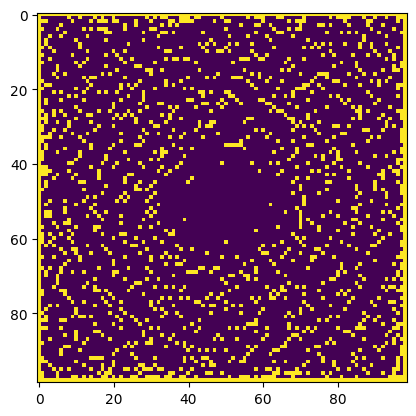

In [44]:
plt.imshow(visible_mask)

In [46]:
print(int(visible_mask.sum()))

1776


### Part 2

In [62]:
def view_distance(grid, location):
    max_dim = len(grid)
    consideration_height = grid[location[0]][location[1]]
    view_distances = [0,0,0,0]
    for dy in range(location[0]+1,max_dim):
        view_distances[0]+=1
        if grid[dy][location[1]]>=consideration_height:
            break

    for dy in range(location[0]-1,-1,-1):
        view_distances[1]+=1
        if grid[dy][location[1]]>=consideration_height:
            break

    for dx in range(location[1]+1,max_dim):
        view_distances[2]+=1
        if grid[location[0]][dx]>=consideration_height:
            break

    for dx in range(location[1]-1,-1,-1):
        view_distances[3]+=1
        if grid[location[0]][dx]>=consideration_height:
            break
    
    return view_distances

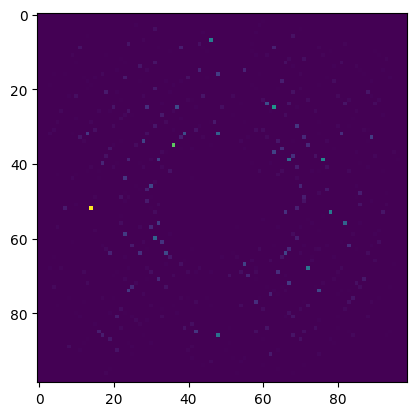

In [64]:
from functools import reduce

scenic_values = np.zeros((dims,dims))

for x in range(1,dims-1):
    for y in range(1,dims-1):
        scenic_values[x,y] = reduce(lambda x, y: x*y, view_distance(grid=input_data,location=[x,y]))

plt.imshow(scenic_values)


In [66]:
int(scenic_values.max())

234416

# Day 9

### Data

In [2]:
from adventofcodedata_22 import data_day9

input_data = data_day9

### Part 1

In [9]:
import math

def away_from_zero(x):
    return int(math.floor(x) if x < 0 else math.ceil(x))


def move_head_tail(position_head, position_tail, direction):
    new_position_head = [position_head[0]+int(direction=="R")-int(direction=="L"), position_head[1]+int(direction=="U")-int(direction=="D")]

    delta_pos = [head_coord - tail_coord for (head_coord, tail_coord) in zip(new_position_head, position_tail)]
    
    if max(abs(delta_pos[0]), abs(delta_pos[1]))>1:
        new_position_tail = [position_tail[0]+away_from_zero(delta_pos[0]/2), position_tail[1]+away_from_zero(delta_pos[1]/2)]
    else:
        new_position_tail = position_tail

    return new_position_head, new_position_tail, (new_position_tail[0],new_position_tail[1])

In [48]:
visited = set()
position_head = [0,0]
position_tail = [0,0]

for instruction in input_data.splitlines():
    direction, distance = instruction.split()
    for i in range(int(distance)):
        position_head, position_tail, tuple_position_tail = move_head_tail(position_head=position_head, position_tail=position_tail, direction=direction)
        visited.add(tuple_position_tail)
print(len(visited))
    

5710


### Part 2

In [10]:
def move_rope(positions, direction_head):
    new_positions = positions
    delta_positions = []
    for rope_part in range(10):
        if rope_part == 0: # Head follows external instruction
            new_positions[rope_part] = [positions[rope_part][0]+int(direction_head=="R")-int(direction_head=="L"), positions[rope_part][1]+int(direction_head=="U")-int(direction_head=="D")]
        else: # Parts follow preceding parts, difference between parts x and x+1 is stored in delta_positions[x]
            if max(abs(delta_positions[rope_part-1][0]), abs(delta_positions[rope_part-1][1]))>1:
                new_positions[rope_part] = [
                        positions[rope_part][0]+away_from_zero(delta_positions[rope_part-1][0]/2),
                        positions[rope_part][1]+away_from_zero(delta_positions[rope_part-1][1]/2)
                    ]
        if rope_part != 9: # No further delta_positions determination for tail
            delta_positions.append([new_positions[rope_part][0]-positions[rope_part+1][0], new_positions[rope_part][1]-positions[rope_part+1][1]])

    return new_positions, (new_positions[9][0],new_positions[9][1])

In [14]:
position_rope = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
visited = set()

for instruction in input_data.splitlines():
    direction, distance = instruction.split()
    for i in range(int(distance)):
        position_rope, tuple_position_tail = move_rope(positions=position_rope, direction_head=direction)
        visited.add(tuple_position_tail)
print(len(visited))

2259


# Day 10

### Data

### Part 1

### Part 2

# Day 11

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 12

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 13

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 14

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 15

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 16

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 17

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 18

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 19

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 20

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 21

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 22

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 23

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 24

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code

# Day 25

## Data

## Part 1

### Functions

### Code

## Part 2

### Functions

### Code